In [6]:
L = 8
J = 1
h = 0.05
lamb = 0.6

particle_pair_left_position = 3
particle_pair_length = 1

final_time = 5
layers = 25
measure_every_layers = 1

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService
# from cobos.tokens import ibm_token, group_instance
from fradm.tokens import ibm_token, group_instance

channel = "ibm_quantum"
device = "ibm_kyiv"
# device = "ibm_fez"
# device = "ibm_sherbrooke"

service = QiskitRuntimeService(channel=channel, token=ibm_token, instance=group_instance)
backend = service.backend(device)

In [11]:
from z2chain.circs import physical_particle_pair_quench_simulation_circuits, physical_particle_pair_quench_simulation_circuits_old

optimization_level = 2

qubits_inds = None

physical_circuits_old = physical_particle_pair_quench_simulation_circuits_old(L, J, h, lamb, particle_pair_left_position, particle_pair_length, final_time, layers, backend, optimization_level, qubits_inds, measure_every_layers=measure_every_layers)
longest_2qb_depth = physical_circuits_old[-1].depth(lambda x: len(x.qubits) == 2)
print("###############################\n Even-Odd trotter step:\n")
print(f"Longest circuit has {longest_2qb_depth} 2-qb depth")
one_layer_2qb_depth = physical_circuits_old[1].depth(lambda x: len(x.qubits) == 2)
print(f"One layer circuit has {one_layer_2qb_depth} 2-qb depth")
print("###############################\n\n")

physical_circuits_low_depth = physical_particle_pair_quench_simulation_circuits(L, J, h, lamb, particle_pair_left_position, particle_pair_length, final_time, layers, backend, optimization_level, qubits_inds, measure_every_layers=measure_every_layers)
longest_2qb_depth = physical_circuits_low_depth[-1].depth(lambda x: len(x.qubits) == 2)
print("###############################\n Commuting trotter step:\n")
print(f"Longest circuit has {longest_2qb_depth} 2-qb depth")
one_layer_2qb_depth = physical_circuits_low_depth[1].depth(lambda x: len(x.qubits) == 2)
print(f"One layer circuit has {one_layer_2qb_depth} 2-qb depth")
print("###############################")

###############################
 Even-Odd trotter step:

Longest circuit has 151 2-qb depth
One layer circuit has 7 2-qb depth
###############################


###############################
 Commuting trotter step:

Longest circuit has 100 2-qb depth
One layer circuit has 4 2-qb depth
###############################


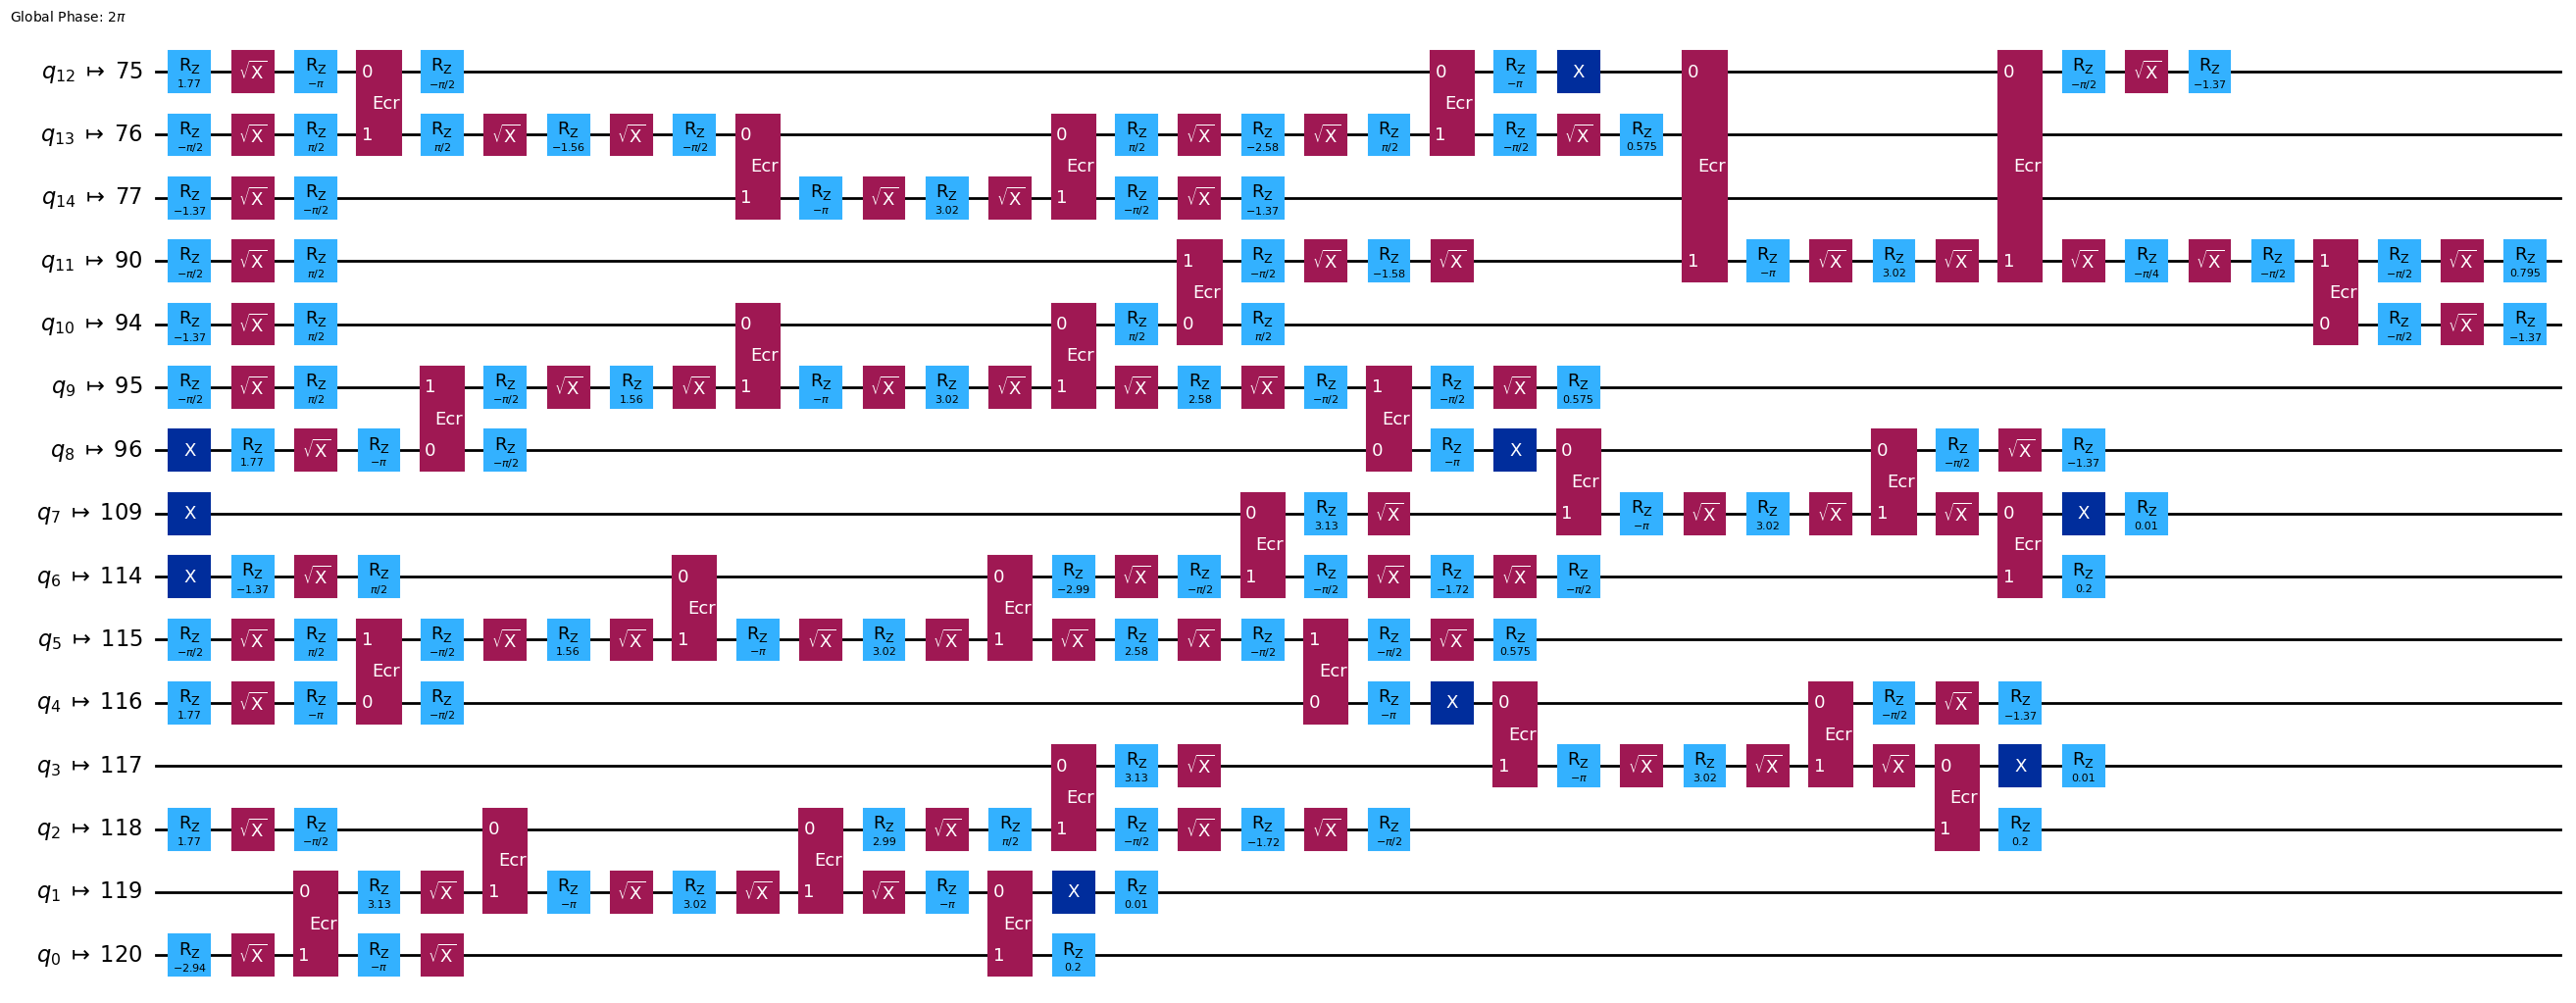

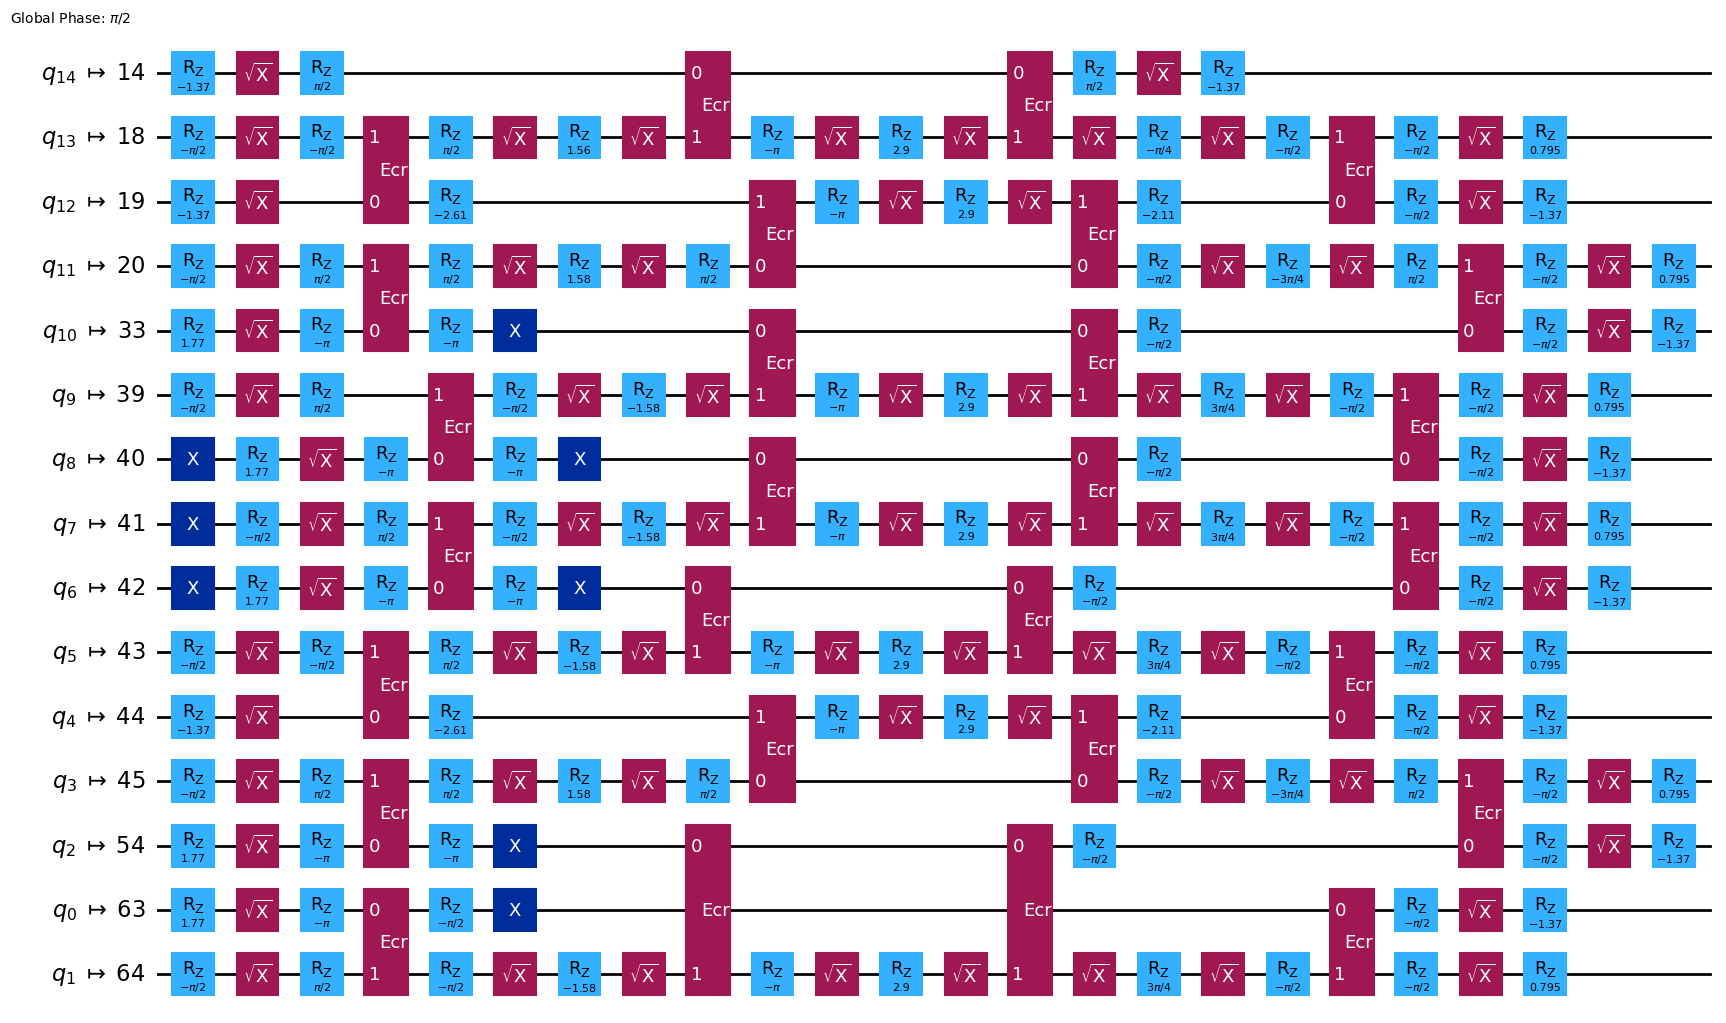

In [9]:
display(physical_circuits_old[1].draw(output="mpl", idle_wires=False, fold=-1))
display(physical_circuits_low_depth[1].draw(output="mpl", idle_wires=False, fold=-1))

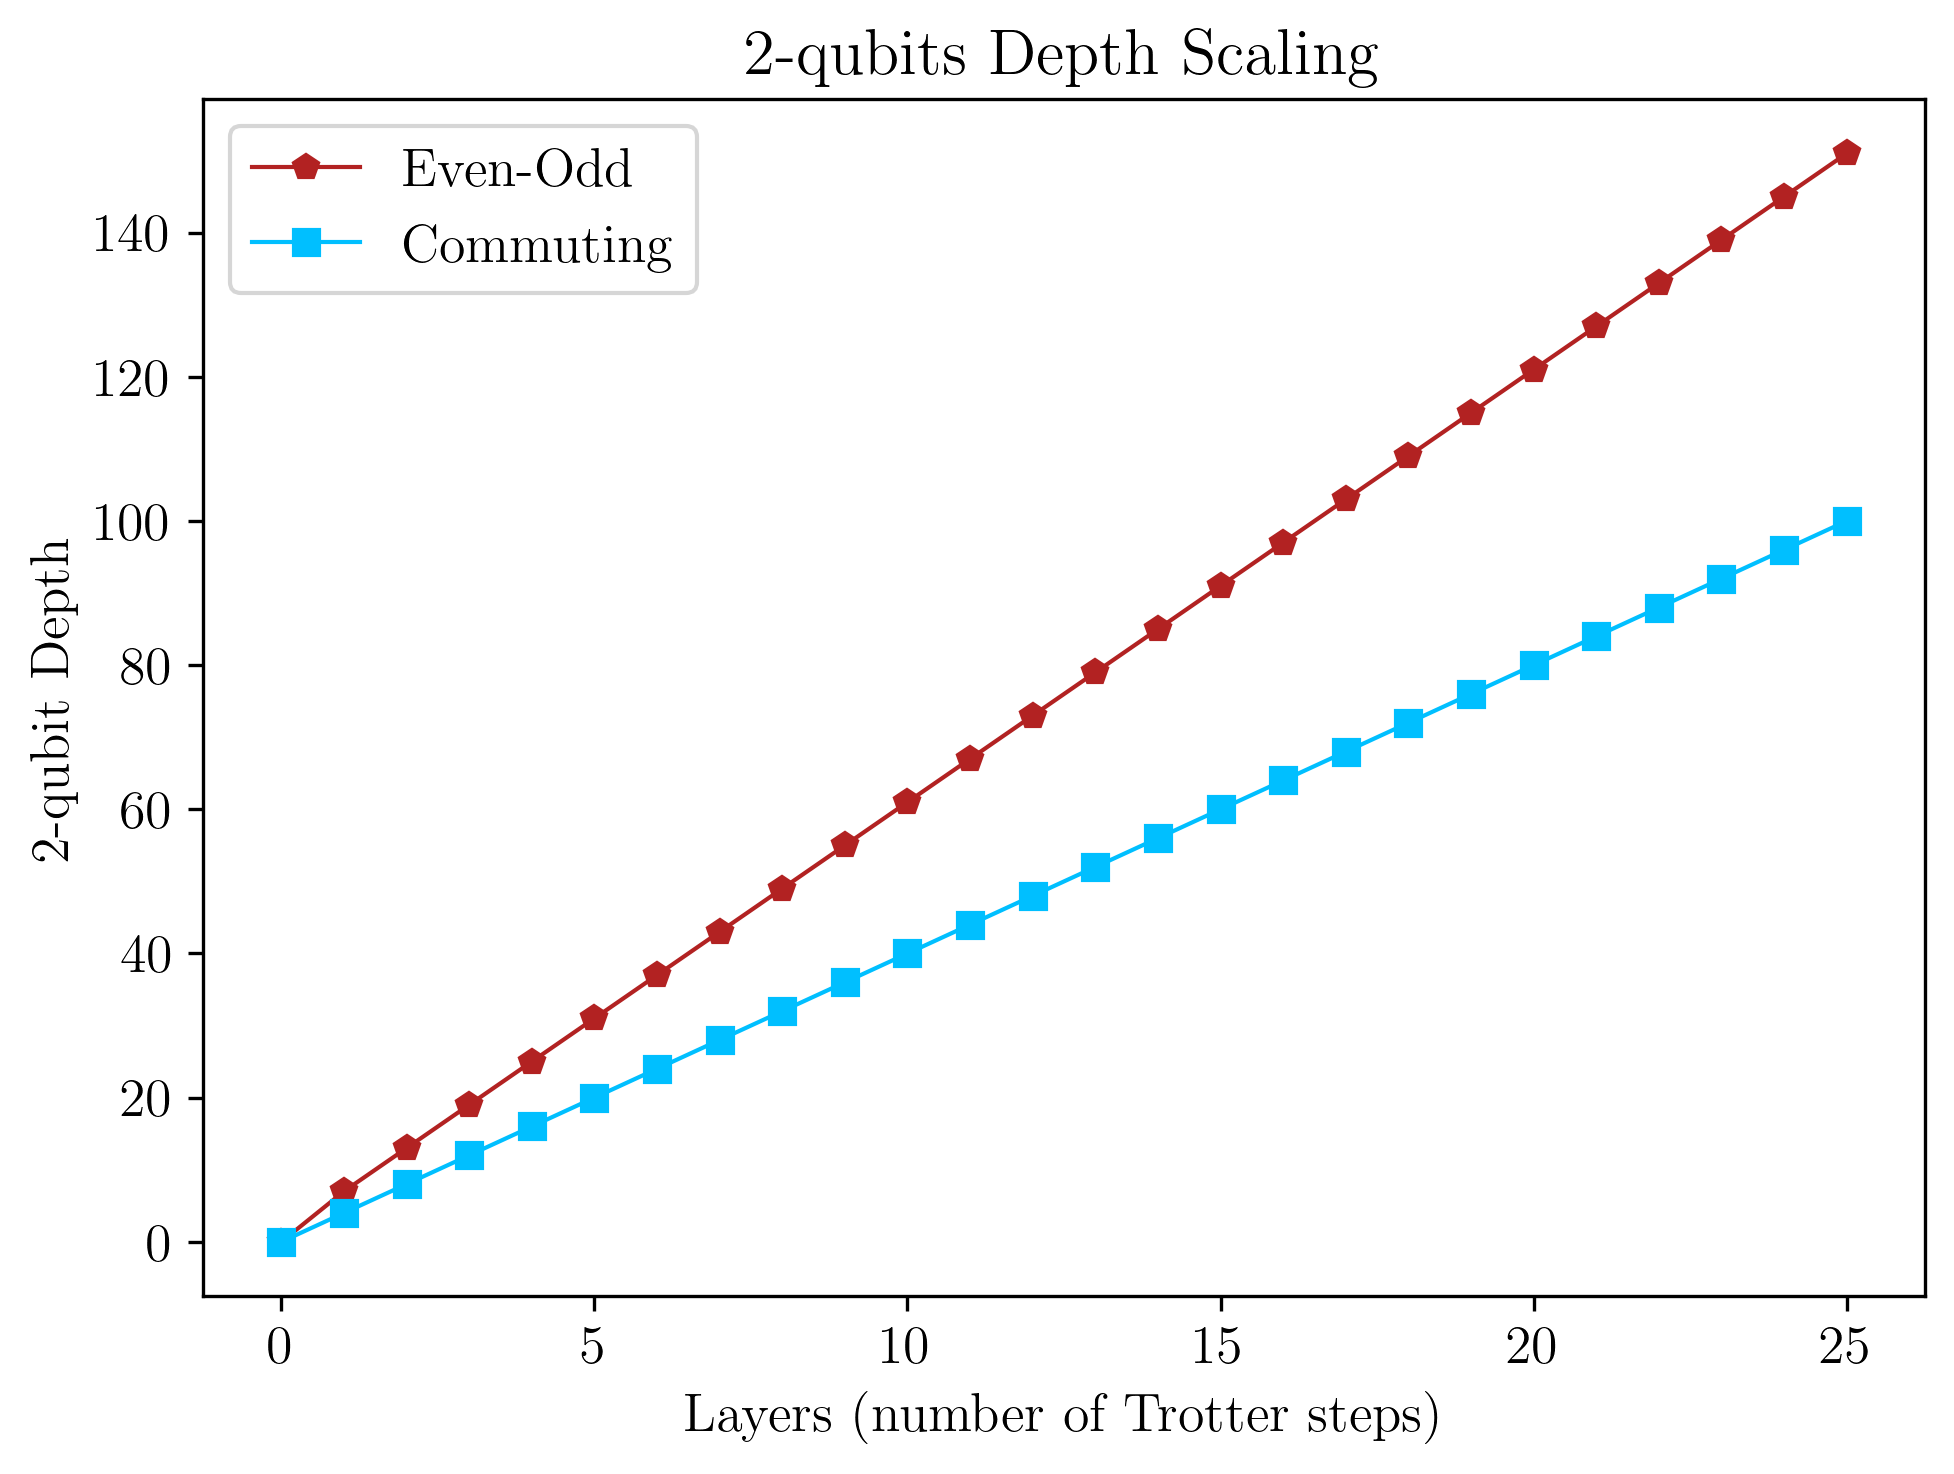

In [19]:
import matplotlib.pyplot as plt

filepath = "Plots/scaling_of_depth_difference_in_hamiltonian_splitting.png"
even_odd_depths = [physical_circuits_old[i].depth(lambda x: len(x.qubits) == 2) for i in range(len(physical_circuits_old))]
commuting_depths = [physical_circuits_low_depth[i].depth(lambda x: len(x.qubits) == 2) for i in range(len(physical_circuits_low_depth))]

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

plt.plot(even_odd_depths, color="firebrick", linewidth=1, marker="p", label="Even-Odd")
plt.plot(commuting_depths, color="deepskyblue", linewidth=1, marker="s", label="Commuting")
plt.title(r"2-qubits Depth Scaling")
plt.xlabel(r"Layers (number of Trotter steps)")
plt.ylabel("2-qubit Depth")
plt.legend()

if filepath:
    plt.savefig(filepath, facecolor="none")